In [1]:
import sys
sys.path.append('../build/Debug')
from libkinematic_calibration import KinematicCalibration
%pylab inline
np.set_printoptions(precision=6, suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def create_solver_options(use_trust_region_minimizer=True):
    solver_options = {
        'minimizer_type':'TRUST_REGION',
        'trust_region_strategy_type':'LEVENBERG_MARQUARDT',
#         'linear_solver_type':'DENSE_QR',
        'linear_solver_type':'SPARSE_NORMAL_CHOLESKY',
        'max_num_iterations': 100,
        'num_threads': 12,
        'num_linear_solver_threads':12,
        'parameter_tolerance': 10e-16,
        'function_tolerance': 10e-16,
        'gradient_tolerance': 10e-16,
        'minimizer_progress_to_stdout':True,
        'trust_region_minimizer_iterations_to_dump':[],
        'trust_region_problem_dump_directory':'',
    }
    return solver_options  
solver_options = create_solver_options()

In [3]:
m0 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m1 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m2 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m3 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m4 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m5 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m6 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
motors = [m0,m1,m2,m3,m4,m5,m6]

In [4]:
n = 10
qs = np.array([np.random.rand((6)) for i in range(n)]).reshape(n,6)
qs

array([[ 0.363751,  0.680867,  0.15828 ,  0.344739,  0.699913,  0.641602],
       [ 0.33663 ,  0.218592,  0.748676,  0.207955,  0.905032,  0.246805],
       [ 0.730445,  0.379618,  0.896604,  0.791161,  0.954327,  0.845345],
       [ 0.61635 ,  0.595182,  0.100559,  0.455277,  0.400641,  0.295666],
       [ 0.360618,  0.160504,  0.095914,  0.283067,  0.488216,  0.014942],
       [ 0.24337 ,  0.953962,  0.8621  ,  0.114066,  0.235679,  0.976255],
       [ 0.70353 ,  0.562853,  0.082506,  0.253013,  0.569595,  0.737261],
       [ 0.817779,  0.281785,  0.847847,  0.72937 ,  0.613793,  0.298896],
       [ 0.802988,  0.115971,  0.137026,  0.375477,  0.410847,  0.648647],
       [ 0.257664,  0.352585,  0.437276,  0.316326,  0.510701,  0.261404]])

In [5]:
kc = KinematicCalibration(solver_options)

In [6]:
kc.run(qs,motors[0], motors[1], motors[2], motors[3], motors[4], motors[5], motors[6])

In [7]:
print(kc.summary()['full_report'])


Solver Summary (v 1.10.0-eigen-(3.2.0)-lapack-suitesparse-(4.2.1)-openmp)

                                     Original                  Reduced
Parameter blocks                            7                        7
Parameters                                 56                       56
Residual blocks                            10                       10
Residual                                   30                       30

Minimizer                        TRUST_REGION

Sparse linear algebra library    SUITE_SPARSE
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver          SPARSE_NORMAL_CHOLESKY   SPARSE_NORMAL_CHOLESKY
Threads                                    12                       12
Linear solver threads                      12                       12

Cost:
Initial                          1.546521e+00
Final                            2.381764e-01
Change                           1.308345e+00

In [8]:
motors

[array([[ 0.992613],
        [-0.      ],
        [-0.121326],
        [-0.      ],
        [ 0.047176],
        [-0.      ],
        [-0.130054],
        [ 0.      ]]), array([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), array([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), array([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), array([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), array([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), array([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])]

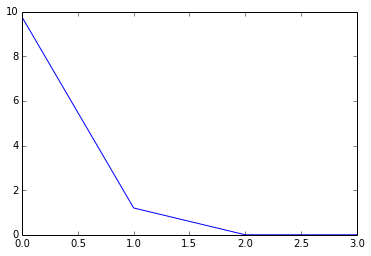

In [9]:
its = kc.summary()['iterations']
plot([i['gradient_max_norm'] for i in its])

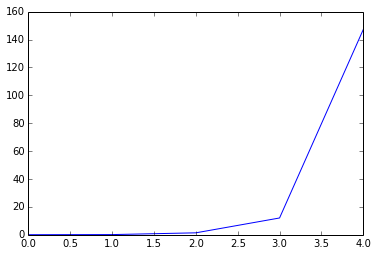

In [10]:
times = np.array([0.0721, 0.1533, 1.4150, 12.0537, 147.1182])
plt.plot(times)

In [11]:
print(times[1] / times[0])
print(times[2] / times[1])
print(times[3] / times[2])

2.12621359223
9.23026744945
8.51851590106
